In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_table("ratings.dat", sep="::")

C:\Users\nihan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [4]:
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,185,5.0,838983525
1,1,231,5.0,838983392
2,1,292,5.0,838983421
3,1,316,5.0,838983392
4,1,329,5.0,838983392


In [5]:
df_title = pd.read_table("movies.dat", sep="::" )

C:\Users\nihan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
df_title.columns =['MovieID', 'Title', 'Genres']
df_title.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [7]:
df_merged = pd.merge(df, df_title, on='MovieID')

In [8]:
df_merged.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,185,5.0,838983525,"Net, The (1995)",Action|Crime|Thriller
1,22,185,3.0,838983343,"Net, The (1995)",Action|Crime|Thriller
2,26,185,4.0,844420985,"Net, The (1995)",Action|Crime|Thriller
3,30,185,4.0,876528949,"Net, The (1995)",Action|Crime|Thriller
4,34,185,3.0,982512301,"Net, The (1995)",Action|Crime|Thriller


In [9]:
df_merged.shape

(9973604, 6)

In [10]:
df_merged['Genres'].nunique()

797

In [12]:
df_merged.describe()

,UserID,MovieID,Rating,Timestamp
count,9.973604e+06,9.973604e+06,9.973604e+06,9.973604e+06
mean,3.587079e+04,4.131216e+03,3.511318e+00,1.032713e+09
std,2.058488e+04,8.947726e+03,1.060603e+00,1.159064e+08
min,1.000000e+00,2.000000e+00,5.000000e-01,7.896520e+08
25%,1.812400e+04,6.620000e+02,3.000000e+00,9.468421e+08
50%,3.574200e+04,1.860000e+03,4.000000e+00,1.035663e+09
75%,5.360900e+04,3.638000e+03,4.000000e+00,1.126762e+09
max,7.156700e+04,6.513300e+04,5.000000e+00,1.231132e+09


In [18]:
ratings = pd.DataFrame(df_merged.groupby('Title')['Rating'].mean())
ratings.head()

,Rating
Title,
"""Great Performances"" Cats (1998)",3.583333
'Round Midnight (1986),3.720000
'Til There Was You (1997),2.837748
"'burbs, The (1989)",2.969415
'night Mother (1986),3.450237


In [20]:
ratings['number_of_ratings'] = df_merged.groupby('Title')['Rating'].count()
ratings.head()

,Rating,number_of_ratings
Title,,
"""Great Performances"" Cats (1998)",3.583333,6
'Round Midnight (1986),3.720000,50
'Til There Was You (1997),2.837748,302
"'burbs, The (1989)",2.969415,1504
'night Mother (1986),3.450237,211


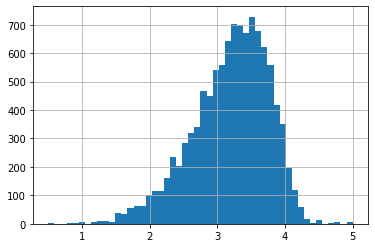

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['Rating'].hist(bins=50)

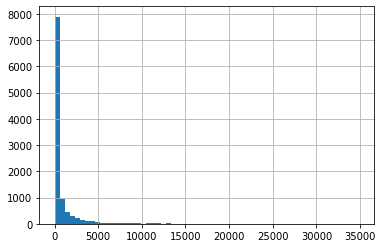

In [22]:
ratings['number_of_ratings'].hist(bins=60)

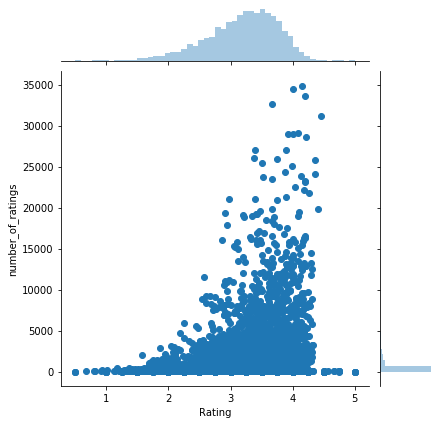

In [24]:
import seaborn as sns
sns.jointplot(x='Rating', y='number_of_ratings', data=ratings)

In [30]:
movie_matrix = df_merged.pivot_table(index='UserID', columns='Title', values='Rating')
movie_matrix.head()

Title,"""Great Performances"" Cats (1998)",'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (a.k.a. The California Dolls) (1981),...And God Created Woman (Et Dieu... crÃ©a la femme) (1956),...And God Spoke (1993),...And Justice for All (1979),...,Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zulu (1964),Zus & Zo (2001),[Rec] (2007),eXistenZ (1999),ffolks (a.k.a. North Sea Hijack) (1980),loudQUIETloud: A Film About the Pixies (2006),xXx: State of the Union (2005),"Ã‚ge d'or, L' (1930)"
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,Rating,number_of_ratings
Title,,
Pulp Fiction (1994),4.157426,34864
Forrest Gump (1994),4.013582,34457
"Silence of the Lambs, The (1991)",4.204200,33668
Jurassic Park (1993),3.661564,32631
"Shawshank Redemption, The (1994)",4.457238,31126
Braveheart (1995),4.082390,29154
"Fugitive, The (1993)",4.006925,28951
Terminator 2: Judgment Day (1991),3.927698,28948
Star Wars: Episode IV - A New Hope (a.k.a. Star Wars) (1977),4.220209,28566


In [42]:
BH_user_rating = movie_matrix['Braveheart (1995)']
contact_user_rating = movie_matrix['Contact (1997)']

In [43]:
BH_user_rating.head()
contact_user_rating.head()

UserID
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Contact (1997), dtype: float64

In [44]:
similar_to_braveheart=movie_matrix.corrwith(BH_user_rating)

C:\Users\nihan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\nihan\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
similar_to_braveheart.head()

Title
"Great Performances" Cats (1998)   -0.693375
'Round Midnight (1986)              0.392524
'Til There Was You (1997)           0.090895
'burbs, The (1989)                  0.119467
'night Mother (1986)                0.168513
dtype: float64

In [47]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [48]:
similar_to_contact.head()

Title
"Great Performances" Cats (1998)    1.000000
'Round Midnight (1986)              0.195801
'Til There Was You (1997)           0.096834
'burbs, The (1989)                  0.128357
'night Mother (1986)                0.130916
dtype: float64

In [49]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_BH = pd.DataFrame(similar_to_braveheart, columns=['correlation'])
corr_BH.dropna(inplace=True)
corr_BH.head()

,correlation
Title,
"""Great Performances"" Cats (1998)",-0.693375
'Round Midnight (1986),0.392524
'Til There Was You (1997),0.090895
"'burbs, The (1989)",0.119467
'night Mother (1986),0.168513


In [50]:
corr_BH = corr_BH.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_BH .head()
corr_contact.head()

,Correlation,number_of_ratings
Title,,
"""Great Performances"" Cats (1998)",1.000000,6
'Round Midnight (1986),0.195801,50
'Til There Was You (1997),0.096834,302
"'burbs, The (1989)",0.128357,1504
'night Mother (1986),0.130916,211


In [51]:
corr_BH[corr_BH['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
Title,,
Braveheart (1995),1.000000,29154
Dreamer: Inspired by a True Story (2005),0.556084,102
Sergeant York (1941),0.524937,161
"What's New, Pussycat (1965)",0.489311,102
"Patriot, The (2000)",0.463494,7132
Gladiator (2000),0.463024,15457
Cube Zero (2004),0.449256,189
What Happens in Vegas... (2008),0.435848,131
Sylvia (2003),0.422416,115


In [52]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
Title,,
Contact (1997),1.000000,11239
In China They Eat Dogs (I Kina spiser de hunde) (1999),0.545200,104
"Hills Have Eyes II, The (2007)",0.539285,113
"Caveman's Valentine, The (2001)",0.528323,156
Crush (2001),0.500964,137
Are We There Yet? (2005),0.497972,104
Fat Albert (2004),0.483030,124
Road to Singapore (1940),0.476768,103
88 Minutes (2008),0.464277,152
